In [91]:
import numpy as np
import re
import string
import pandas as pd
import nltk

In [94]:
data = pd.read_csv('train_final.csv',encoding = "ISO-8859-1")
data = data.loc[:,['id','label','tweet']]
data.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(26720, 3)

In [95]:
dt = []
for i in range(len(data['tweet'])):
    input_txt = data['tweet'][i]
    r = re.findall("@[\w]*",data['tweet'][i])
    for sen in r:
            input_txt = re.sub(sen,'',data['tweet'][i])
    dt.append(input_txt)
data['clean'] = dt

In [96]:
data['clean'] = data['clean'].str.replace("[^a-zA-Z#]", " ")

In [97]:
data.head()

,id,label,tweet,clean
0,NaN,0,.@AppStore Loving my #iPad EXCEPT for fact it ...,Loving my #iPad EXCEPT for fact it won t pla...
1,NaN,0,ticket booked for this house with piervld - ca...,ticket booked for this house with piervld ca...
2,NaN,0,be ! get involved in #volunteering!,be get involved in #volunteering
3,NaN,1,Shoutout to Apple for deleting everything off ...,Shoutout to Apple for deleting everything off ...
4,NaN,1,@scribb Rebooted/uninstalled it/reinstalled it...,Rebooted uninstalled it reinstalled it itune...


In [98]:
def tokenise (data_element):
    tokenized_data = data_element.apply(lambda x: x.split())
    return tokenized_data


def join(tokenized_data):
    joined_data = ''
    for i in range(len(tokenized_data)):
        joined_data = joined_data+(tokenized_data[i])
        joined_data = joined_data + ' '
    return joined_data


In [99]:
#from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenise(data['clean'])

dtwt=[]
for token in tokenized_tweet  :
    clean_token=[]
    for i in token:
        if i not in stopwords.words('english') and (len(i)>3):
            #clean_token.append(stemmer.stem(i))
            clean_token.append(lemmatizer.lemmatize(i))
    dtwt.append(join(clean_token))
  

In [100]:
data.clean = dtwt

In [101]:
from wordcloud import WordCloud

In [102]:
import matplotlib.pyplot as plt

In [103]:
import matplotlib.cm as cmp 

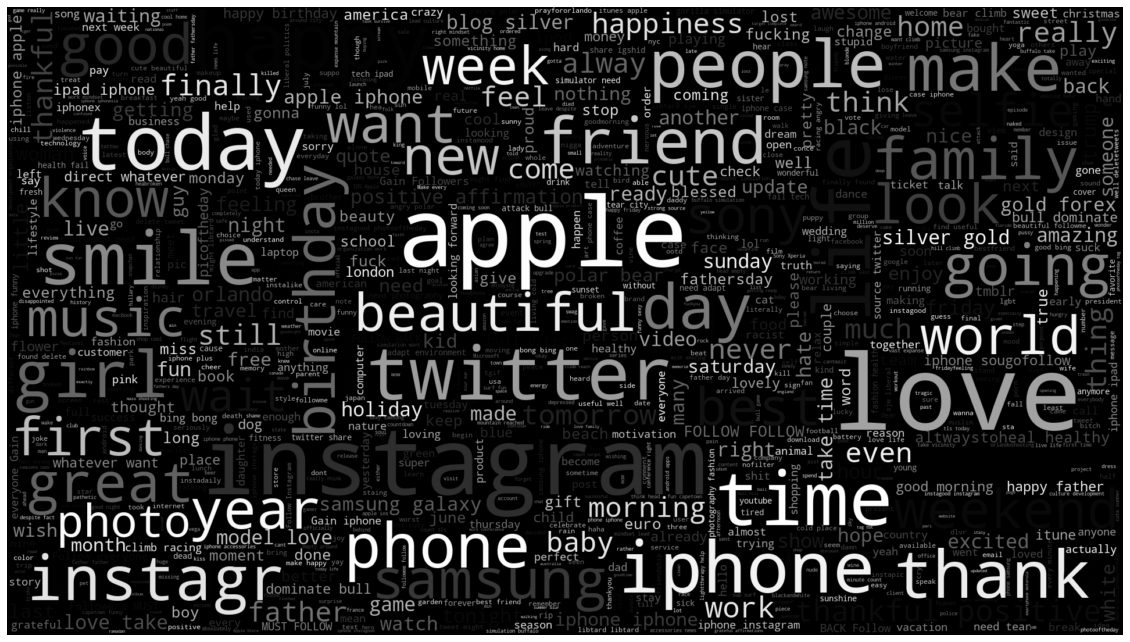

In [104]:
word = ' '.join([text for text in data['clean']])

wc = WordCloud(background_color='black',
               colormap=cmp.gist_gray,
               width=1920,
               height=1080,
               random_state=21,
               max_words=1000,
               max_font_size=180).generate(word)

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

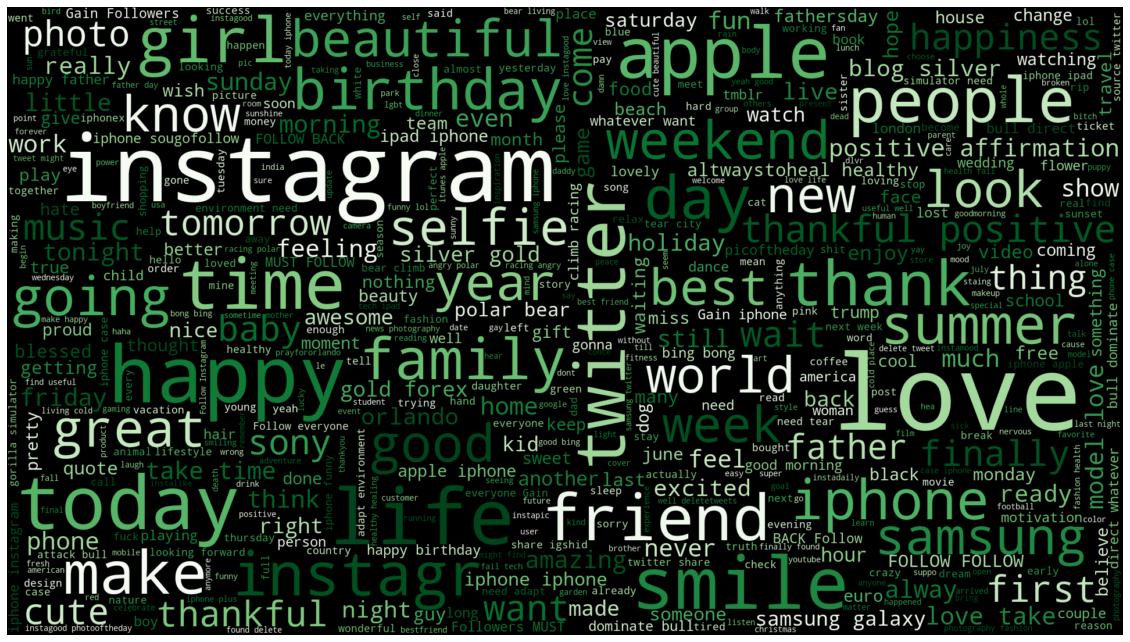

In [105]:
pwords = ' '.join([text for text in data['clean'][data['label'] == 0]])


wcp= WordCloud(background_color='black',
               colormap=cmp.Greens_r,
               width=1920,
               height=1080,
               random_state=21,
               max_words=500,
               max_font_size=180).generate(pwords)

plt.figure(figsize=(20, 20))
plt.imshow(wcp, interpolation="bilinear")
plt.axis('off')
plt.show()

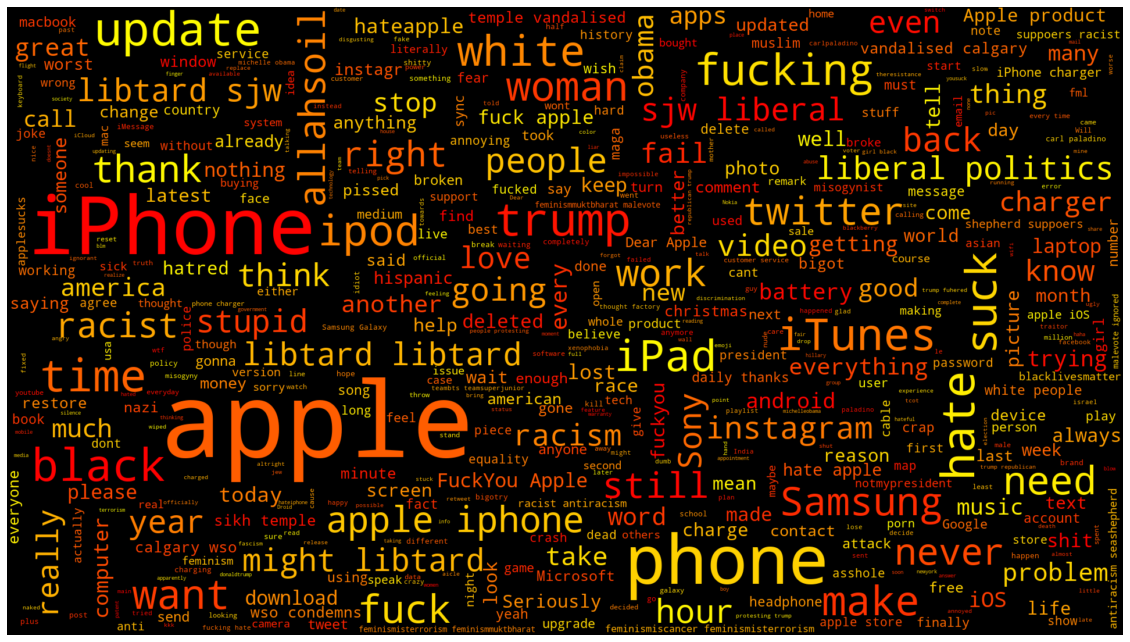

In [106]:
nwords = ' '.join([text for text in data['clean'][data['label'] == 1]])

wcn= WordCloud(background_color='black',
               colormap=cmp.autumn_r,
               width=1920,height=1080,
               random_state=21,
               max_words=500,
               max_font_size=180).generate(nwords)

plt.figure(figsize=(20, 20))
plt.imshow(wcn, interpolation="bilinear")
plt.axis('off')
plt.show()

In [107]:
import seaborn as sb

In [108]:
def hasht(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [109]:
h_regular = hasht(data['clean'][data['label'] == 0])
h_negative = hasht(data['clean'][data['label'] == 1])

In [110]:
h_regular = sum(h_regular,[])
h_negative = sum(h_negative,[])

In [111]:
freg = nltk.FreqDist(h_regular)
f_reg = pd.DataFrame({'Words': list(freg.keys()),
                  'Count': list(freg.values())})
fneg = nltk.FreqDist(h_negative)
f_neg = pd.DataFrame({'Words': list(fneg.keys()),
                  'Count': list(fneg.values())})

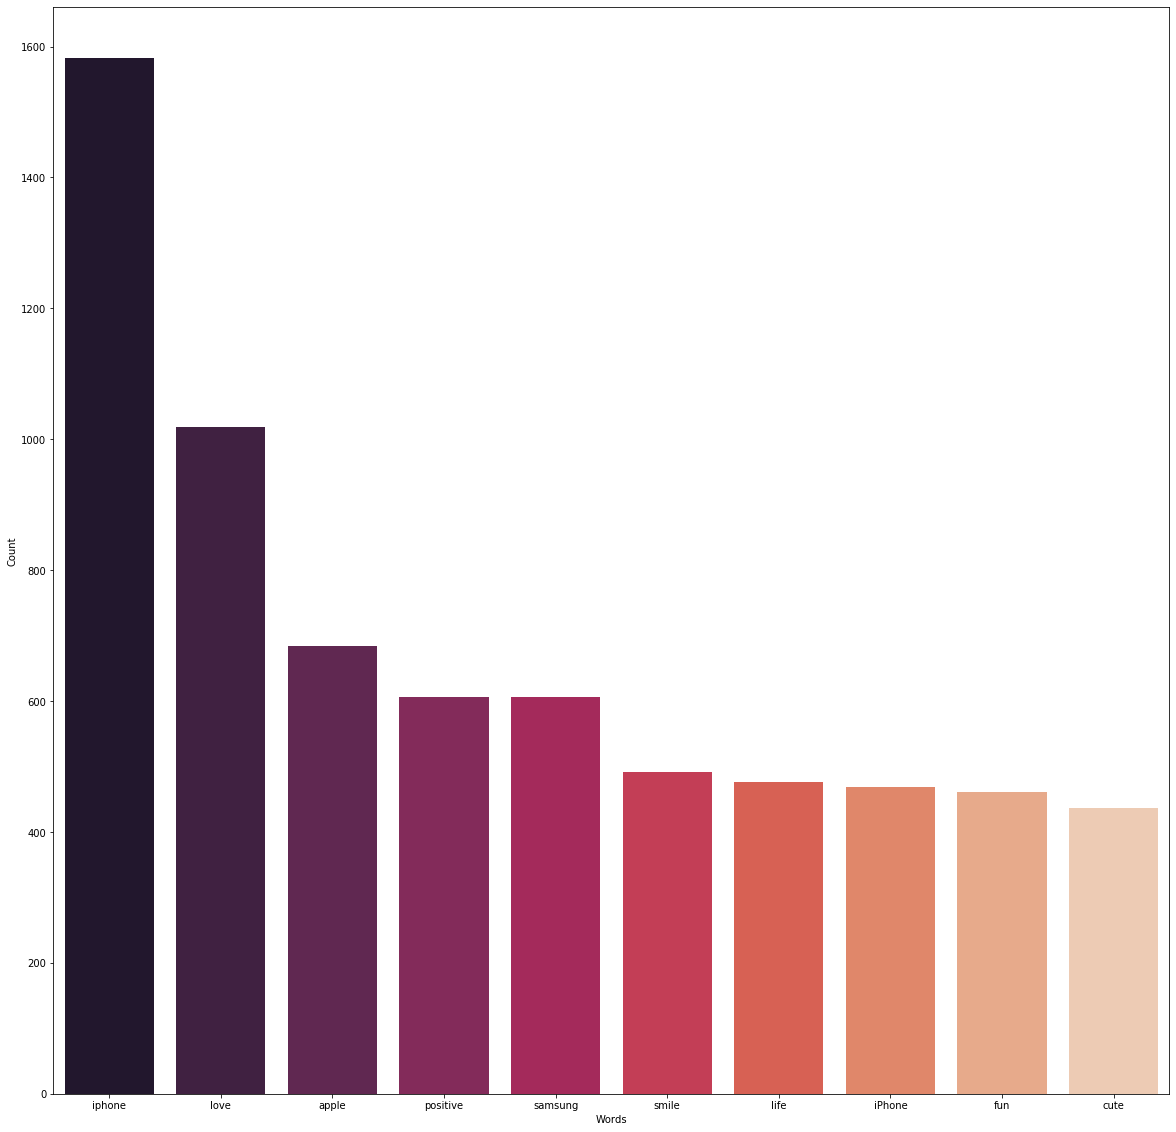

In [112]:
f_reg = f_reg.nlargest(columns="Count", n = 10) 
f_neg = f_neg.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(20,20))

rx = sb.barplot(data=f_reg, x= "Words", y = "Count",palette='rocket')
rx.set(ylabel = 'Count')

plt.show()

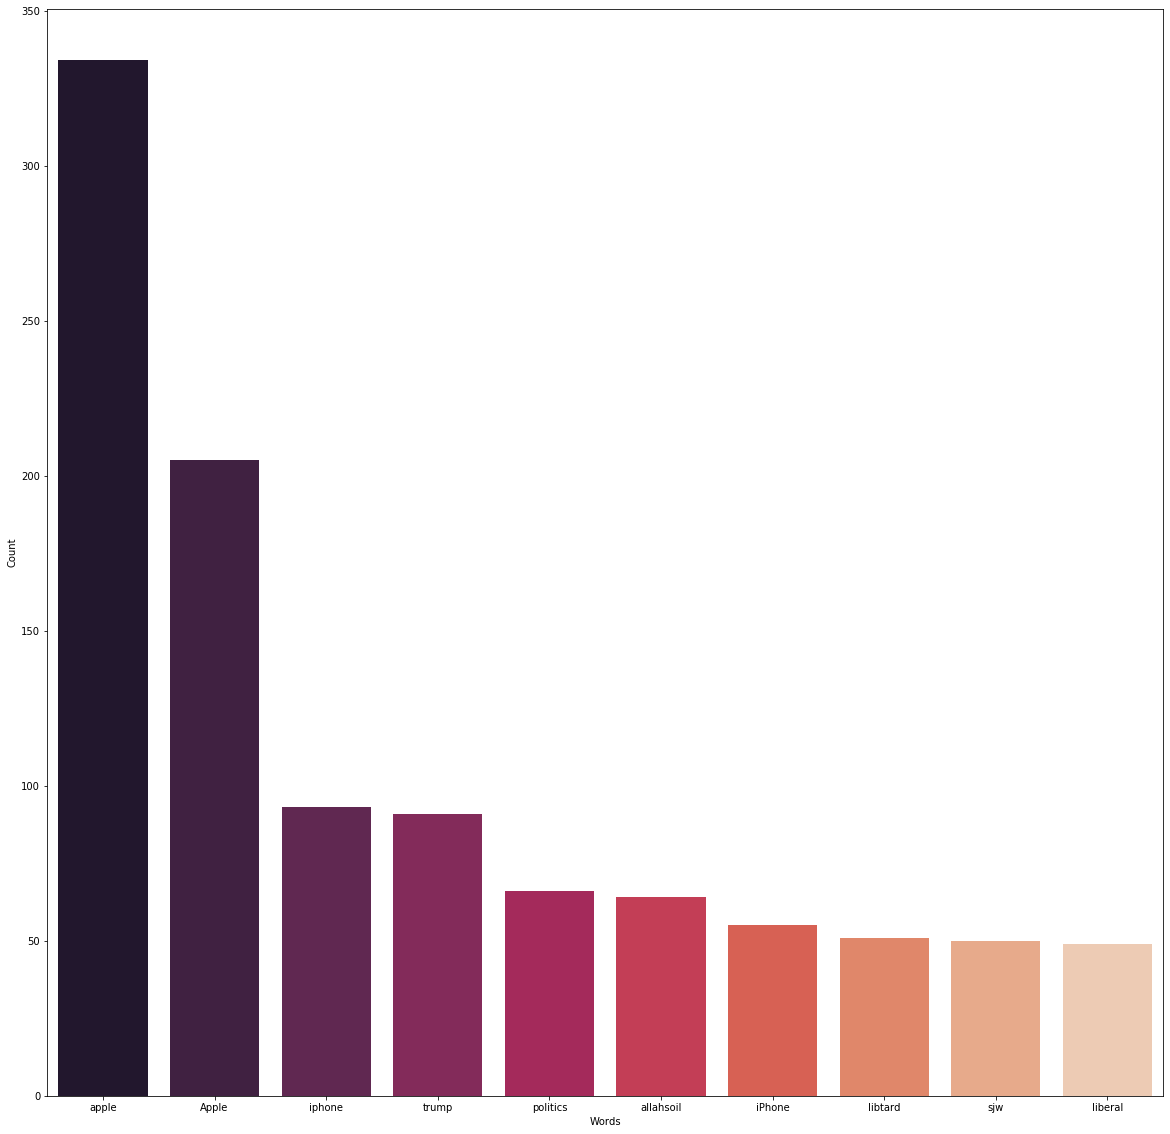

In [113]:
plt.figure(figsize=(20,20))

nx = sb.barplot(data=f_neg, x= "Words", y = "Count",palette='rocket')
nx.set(ylabel = 'Count')
plt.show()

In [114]:
#BAG OF WORDS

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
cnt_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [117]:
bag = cnt_vectorizer.fit_transform(data['clean'])

In [118]:
#TF/IDF

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [121]:
tfidf = tfidf_vectorizer.fit_transform(data['clean'])

In [122]:
from sklearn.model_selection import train_test_split
x= tfidf
y=data['label']
pred=pd.read_csv('test_final.csv')
x_test=pred['tweet']
y_test=pred.label


dt = []
for i in range(len(pred['tweet'])):
    input_txt = pred['tweet'][i]
    r = re.findall("@[\w]*",pred['tweet'][i])
    for sen in r:
            input_txt = re.sub(sen,'',pred['tweet'][i])
    dt.append(input_txt)
pred['clean'] = dt
pred['clean'] = pred['clean'].str.replace("[^a-zA-Z#]", " ")

tokenized_tweet = tokenise(pred['clean'])

dtwt=[]
for token in tokenized_tweet  :
    clean_token=[]
    for i in token:
        if i not in stopwords.words('english') and (len(i)>3):
            #clean_token.append(stemmer.stem(i))
            clean_token.append(lemmatizer.lemmatize(i))
    dtwt.append(join(clean_token))
pred.clean=dtwt

x_test=tfidf_vectorizer.fit_transform(pred.clean)

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [124]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
svc =SVC(kernel='rbf')
svc1 = SVC(kernel='linear')



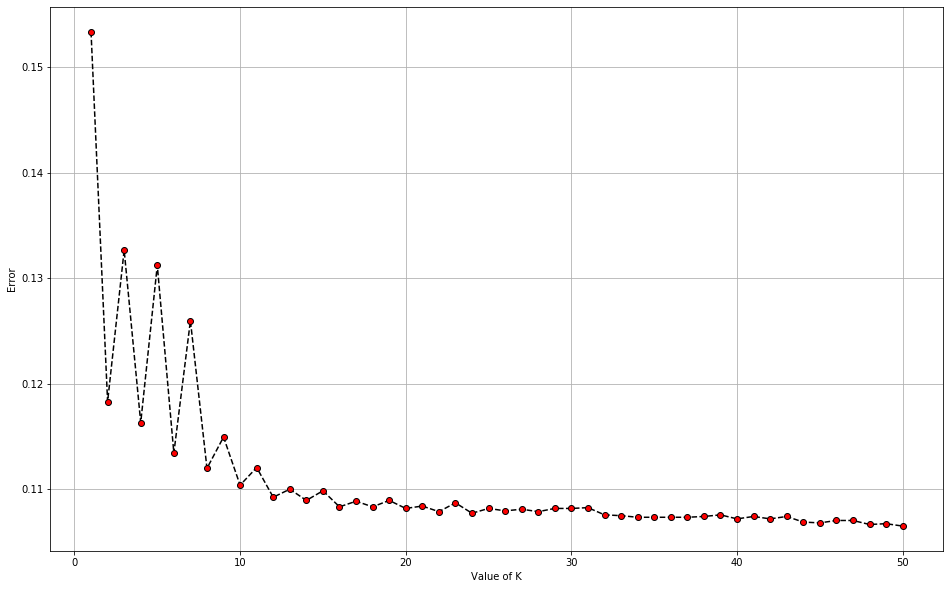

In [137]:

error = []
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    pred = knn.predict(x_test)
    error.append(np.mean(pred!=y_test))
    
plt.figure(figsize=(16,10))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.plot(range(1,51),error,'black',marker='o',markerfacecolor='red',linestyle='dashed')

In [138]:
minpos = error.index(min(error))
minpos+1

50

In [139]:
knn = KNeighborsClassifier(n_neighbors=50)

rfc = RandomForestClassifier(n_estimators=1000)

In [140]:
lr.fit(x,y)
dtc.fit(x,y)
svc.fit(x,y)
svc1.fit(x,y)
knn.fit(x,y)
rfc.fit(x,y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [141]:


lrtf_pred = lr.predict(x_test)
dtctf_pred = dtc.predict(x_test)
svctf_pred = svc.predict(x_test)
svc1tf_pred = svc1.predict(x_test)
knntf_pred = knn.predict(x_test)
rfctf_pred = rfc.predict(x_test)

In [142]:
from sklearn.metrics import accuracy_score,auc,f1_score,recall_score,precision_score,roc_auc_score,roc_curve

In [160]:

lrac = accuracy_score(y_test,lrtf_pred)*100
dtac = accuracy_score(y_test,dtctf_pred)*100

svclac = accuracy_score(y_test,svc1tf_pred)*100
knnac = accuracy_score(y_test,knntf_pred)*100
rfac = accuracy_score(y_test,rfctf_pred)*100


lrp = precision_score(y_test,lrtf_pred)
dtp = precision_score(y_test,dtctf_pred)
svclp = precision_score(y_test,svc1tf_pred)
knnp = precision_score(y_test,knntf_pred)
rfp = precision_score(y_test,rfctf_pred)

lrr = recall_score(y_test,lrtf_pred)
dtr = recall_score(y_test,dtctf_pred)
svclr = recall_score(y_test,svc1tf_pred)
knnr = recall_score(y_test,knntf_pred)
rfr = recall_score(y_test,rfctf_pred)



In [161]:
result = pd.DataFrame({
    'Algorithm':['Logistic Regression','Decision Tree',
                 'SVC-linear','KNN','Random Forest'],
    'Accuracy':[lrac,dtac,svclac,knnac,rfac],
    'Precision':[lrp,dtp,svclp,knnp,rfp],
    'Recall':[lrr,dtr,svclr,knnr,rfr]
})

In [162]:
result

,Algorithm,Accuracy,Precision,Recall
0,Logistic Regression,89.196171,0.474359,0.078723
1,Decision Tree,83.376387,0.213549,0.205674
2,SVC-linear,88.656739,0.394402,0.109929
3,KNN,89.355721,0.549451,0.035461
4,Random Forest,86.840906,0.270000,0.134043


In [ ]:
roc_curve()

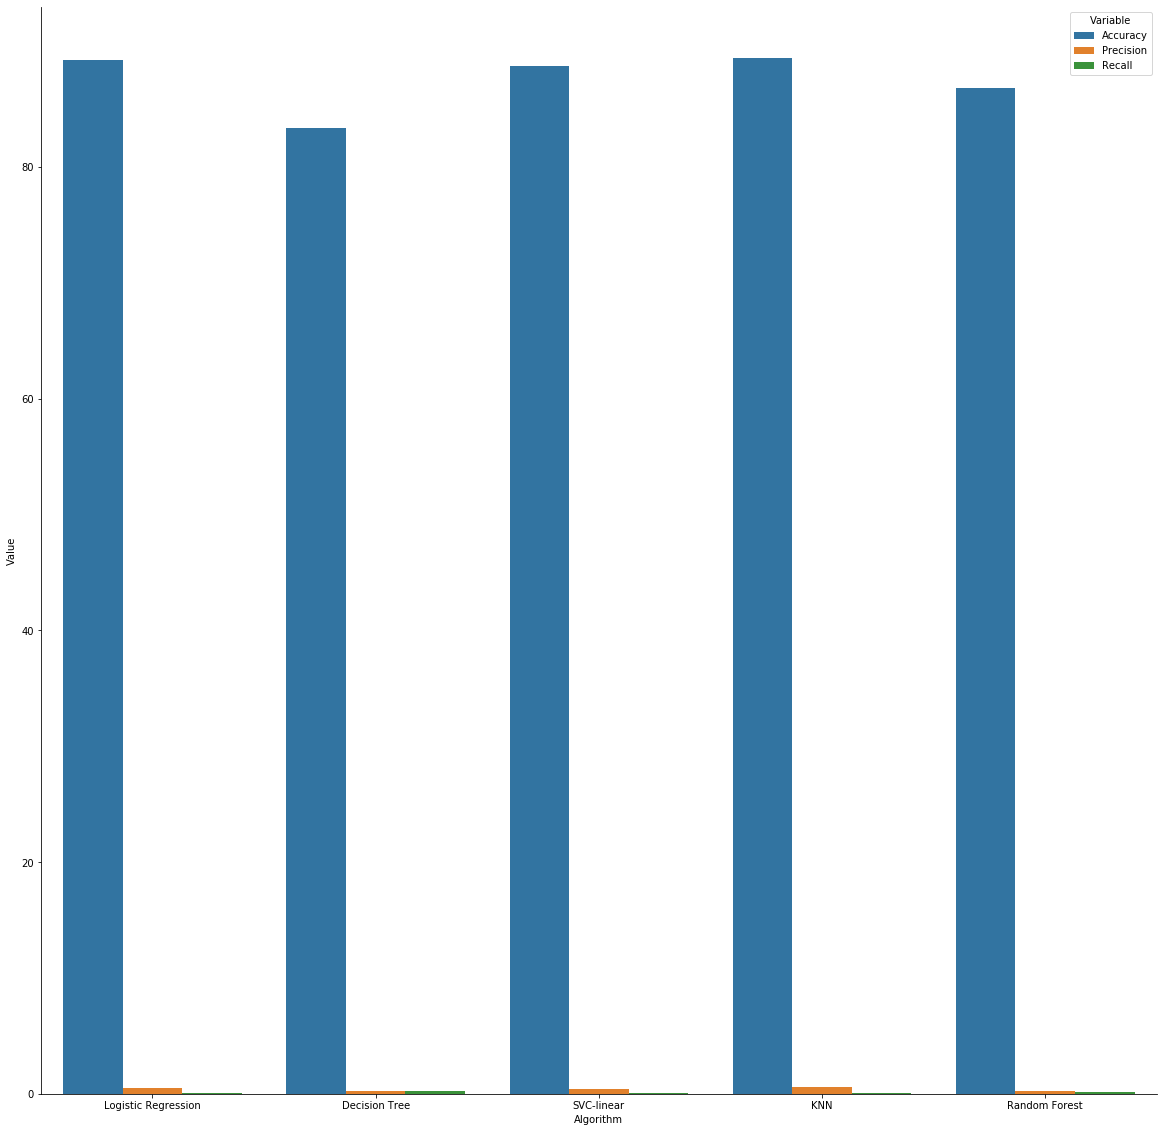

In [163]:
fig, ax1 = plt.subplots(figsize=(20, 20))
tidy = result.melt(id_vars='Algorithm').rename(columns=str.title)
sb.barplot(x='Algorithm', y='Value', hue='Variable', data=tidy, ax=ax1)
sb.despine(fig)